In [199]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
fireballs = pd.read_csv("./data/Fireball Reports.csv")
meteorites = pd.read_csv("./data/Meteorite_Landings.csv")
exoplanets = pd.read_csv("./data/exoplanets.csv")
astronauts = pd.read_csv("./data/astronauts.csv")
earthquakes = pd.read_csv("./data/SolarSystemAndEarthquakes.csv")

# Have to remember how to read ZIP files and unzip them on the fly

In [201]:
ufos = pd.read_csv("./data/UFO_Sightings_Global.csv")


/usr/local/anaconda3/envs/machine_learning/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [210]:
ufos.loc[ufos['latitude'] == '33q.200088', 'latitude'] = '33.200088'
ufos = ufos.astype({'latitude': 'float64'})
ufos.describe()

,duration (s),latitude,longitude
count,100995.000000,96408.000000,96408.000000
mean,785.662647,38.571513,-93.536419
std,3484.261700,5.953439,22.547966
min,0.000000,-46.163992,-176.658056
25%,30.000000,34.108333,-113.289167
50%,180.000000,39.048333,-88.827778
75%,600.000000,42.166667,-80.223462
max,345600.000000,71.387500,169.875050


In [212]:
print(fireballs.shape)
fireballs.head()

(92, 10)


,DateTime of Peak Brightness,Latitude,Longitude,Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2009-11-21 20:53:00,-22.0,29.2,38.0,32.1,3.0,-17.0,-27.0,10000000000000,18.00
1,2015-01-09 10:41:11,2.0,28.8,36.0,NaN,-10.7,-7.6,11.6,139000000000,0.41
2,2014-05-16 12:42:48,-44.2,-176.2,44.0,NaN,14.4,4.6,6.5,309000000000,0.82
3,2014-08-23 06:29:41,-61.7,132.6,22.2,16.2,-2.3,5.7,16.5,3820000000000,7.60
4,2014-12-12 06:48:11,33.5,144.9,26.3,NaN,11.5,-2.8,-2.2,33000000000,0.11


In [213]:
print(meteorites.shape)
meteorites.head()

(45716, 10)


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [214]:
print(exoplanets.shape)
exoplanets.head()

(3912, 20)


,loc_rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,pl_bmassprov,pl_radj,pl_dens,st_teff,st_mass,st_rad,rowupdate,pl_facility,last_updated
0,1,11 Com,b,11 Com b,Radial Velocity,1,326.03000,1.29,0.231,NaN,19.40,Msini,NaN,NaN,4742.0,2.70,19.00,2014-05-14,Xinglong Station,2014-05-14
1,2,11 UMi,b,11 UMi b,Radial Velocity,1,516.21997,1.53,0.080,NaN,14.74,Msini,NaN,NaN,4213.0,2.78,29.79,2018-09-06,Thueringer Landessternwarte Tautenburg,2018-09-06
2,3,14 And,b,14 And b,Radial Velocity,1,185.84000,0.83,0.000,NaN,4.80,Msini,NaN,NaN,4813.0,2.20,11.00,2014-05-14,Okayama Astrophysical Observatory,2014-05-14
3,4,14 Her,b,14 Her b,Radial Velocity,1,1773.40002,2.93,0.370,NaN,4.66,Msini,NaN,NaN,5338.0,0.90,0.93,2018-09-06,W. M. Keck Observatory,2018-09-06
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,1,798.50000,1.66,0.680,NaN,1.78,Msini,NaN,NaN,5750.0,1.08,1.13,2018-09-06,Multiple Observatories,2018-09-06


In [215]:
print(astronauts.shape)
astronauts.head()

(357, 19)


,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN


In [216]:
print(earthquakes.shape)
earthquakes.head()

(3646, 108)


,earthquake.time,earthquake.latitude,earthquake.longitude,earthquake.mag,earthquake.place,MoonPhase.dynamic,MoonPhase.value,MoonPhase.total,MoonPhase.percent,MoonPhase.illumination,...,Neptune.housenumber,Pluto.longitude,Pluto.latitude,Pluto.rectascension,Pluto.declination,Pluto.azimuth,Pluto.height,Pluto.speed,Pluto.house,Pluto.housenumber
0,2016-04-29T01:33:38.940Z,10.2705,-103.7150,6.6,Northern East Pacific Rise,dsc,21.102878,29.530588,71.461083,28.538917,...,4.855731,287.456664,1.458687,288.717312,-20.849043,294.602418,-60.711436,-0.004875,62.774958,3.092499
1,2016-04-28T19:33:24.420Z,-16.0743,167.3926,7.0,1km SE of Norsup_Vanuatu,dsc,20.801902,29.530588,70.441882,29.558118,...,10.821472,287.458035,1.458864,288.718743,-20.848692,75.715379,61.913464,-0.005482,242.688552,9.089618
2,2016-04-20T08:33:47.600Z,0.6359,-80.2083,6.2,19km WNW of Muisne_Ecuador,asc,13.041587,29.530588,44.162976,88.325952,...,12.866854,287.484120,1.466467,288.745387,-20.837893,306.628344,52.338472,-0.000961,301.730362,11.057679
3,2016-04-16T23:58:37.280Z,0.3715,-79.9398,7.8,27km SSE of Muisne_Ecuador,asc,10.108874,29.530588,34.231876,68.463751,...,5.254719,287.484562,1.469462,288.745447,-20.834871,322.775621,-63.936274,0.000967,73.503629,3.450121
4,2016-04-15T16:25:06.260Z,32.7820,130.7259,7.0,1km WSW of Kumamoto-shi_Japan,asc,8.803186,29.530588,29.810397,59.620794,...,2.162465,287.483388,1.470527,288.744056,-20.833960,299.716096,6.217801,0.001607,350.113718,12.670457


In [217]:
print(ufos.shape)
ufos.head()

(117896, 10)


,day_sighted,time,Shape,duration (s),Location,country,description,latitude,longitude,State/Region
0,2019-01-31,21:00:00,light,600.0,"Las vegas, NV",United States,Pink light in sky making light orbs you could ...,36.175000,-115.136389,Nevada
1,2019-01-31,20:27:00,other,NaN,"Lumpkin, GA",United States,Unidentifiable shape hovering over field in Lu...,32.050833,-84.799167,Georgia
2,2019-01-31,18:00:00,circle,360.0,"Hollywood, CA",United States,Circular red object with green flashing light ...,34.098333,-118.325833,California
3,2019-01-31,18:00:00,fireball,1200.0,"Albany, OR",United States,Was outside having a smoke while I had seen lo...,44.636667,-123.104722,Oregon
4,2019-01-31,04:30:00,circle,300.0,"Seattle, WA",United States,Small Blue Orb traveling east from Magnolia to...,47.606389,-122.330833,Washington


## Idea 1: plot earthquakes

I'm missing that nice way of getting a background map. :(

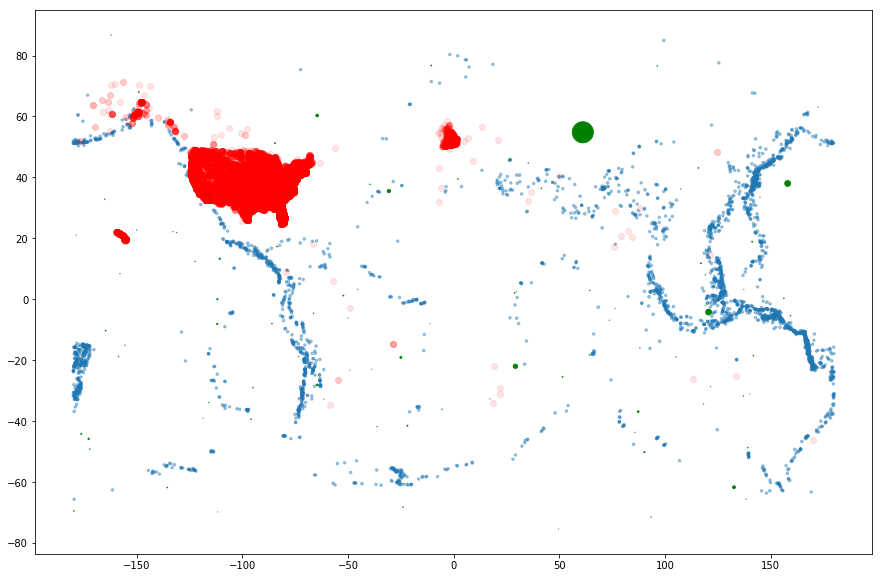

In [233]:
plt.figure(figsize=(15,10))
plt.scatter(earthquakes['earthquake.longitude'], earthquakes['earthquake.latitude'], earthquakes['earthquake.mag'],alpha=0.4);
plt.scatter(ufos['longitude'], ufos['latitude'], c='red', alpha=0.1);

plt.scatter(fireballs['Longitude'], fireballs['Latitude'],
                fireballs['Calculated Total Impact Energy (kt)'], c='green', alpha=1);


Fireballs

(array([ 89.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  7.30000000e-02,   2.20693500e+01,   4.40657000e+01,
          6.60620500e+01,   8.80584000e+01,   1.10054750e+02,
          1.32051100e+02,   1.54047450e+02,   1.76043800e+02,
          1.98040150e+02,   2.20036500e+02,   2.42032850e+02,
          2.64029200e+02,   2.86025550e+02,   3.08021900e+02,
          3.30018250e+02,   3.52014600e+02,   3.74010950e+02,
          3.96007300e+02,   4.18003650e+02,   4.40000000e+02]),
 <a list of 20 Patch objects>)

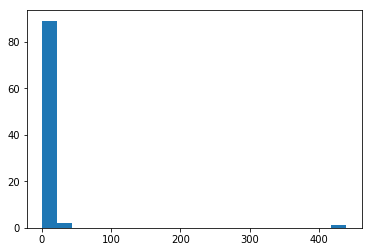

In [177]:
plt.hist(fireballs['Calculated Total Impact Energy (kt)'], bins=20)

In [69]:
fireballs[fireballs['Calculated Total Impact Energy (kt)'] > 100]

,DateTime of Peak Brightness,Latitude,Longitude,Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
23,2013-02-15 03:20:33,54.8,61.1,23.3,18.6,12.8,-13.3,-2.4,375000000000000,440.0


In [70]:
fireballs.describe()

,Latitude,Longitude,Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
count,92.000000,92.000000,68.000000,7.000000,52.000000,52.000000,52.000000,9.200000e+01,92.000000
mean,-5.542391,-4.926087,32.314706,19.228571,1.469231,-2.836538,-1.138462,4.897685e+12,6.347348
std,37.503410,110.565641,8.613219,6.119018,11.427033,11.861175,10.081144,3.913597e+13,46.010305
min,-75.400000,-179.700000,18.700000,12.400000,-35.400000,-43.500000,-27.000000,2.000000e+10,0.073000
25%,-32.725000,-110.950000,26.300000,17.100000,-5.050000,-11.725000,-7.925000,3.875000e+10,0.130000
50%,-7.450000,-10.900000,30.700000,18.100000,1.850000,-2.300000,-1.600000,7.400000e+10,0.230000
75%,19.425000,98.525000,37.000000,18.900000,10.375000,4.825000,5.600000,1.905000e+11,0.535000
max,86.700000,172.300000,66.600000,32.100000,21.300000,16.100000,17.000000,3.750000e+14,440.000000


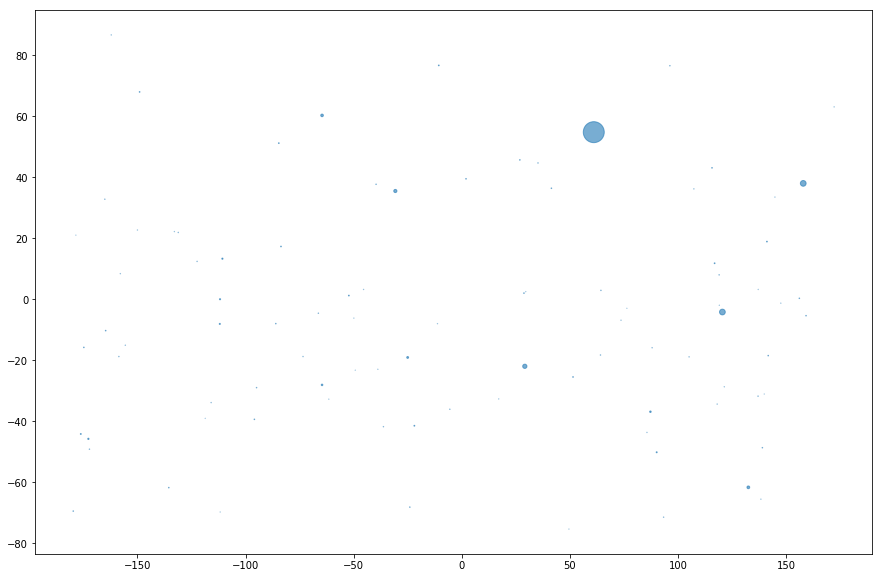

In [73]:
plt.figure(figsize=(15,10))
ufosplt.scatter(fireballs['Longitude'], fireballs['Latitude'], fireballs['Calculated Total Impact Energy (kt)'], alpha=0.6);

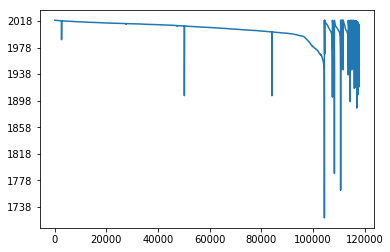

In [343]:
ufos.day_sighted=pd.to_datetime(ufos.day_sighted)
plt.plot(ufos.day_sighted)



In [344]:
ufos['year_sighted'] = [d.year for d in ufos.day_sighted]

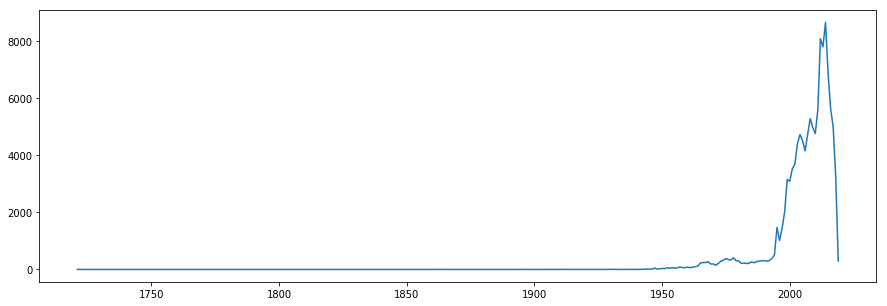

In [180]:
plt.figure(figsize=(15,5))
ufos_year = ufos.groupby('year_sighted').count()
plt.plot(ufos_year['day_sighted']);

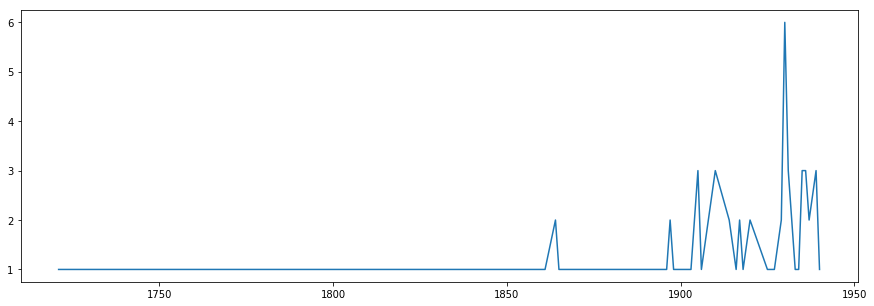

In [338]:
plt.figure(figsize=(15,5))
plt.plot(ufos_year.loc[:1940,'day_sighted']);

In [182]:
ufos[ufos.year_sighted == 1965]

,day_sighted,time,Shape,duration (s),Location,country,description,latitude,longitude,State/Region,year_sighted
103169,1965-12-24,23:59:00,triangle,3600.0,"Bellmar, NJ",United States,"delta shaped object, missing time I was perha...",1965-12-24 00:00:00,-74.021804,New Jersey,1965
103170,1965-12-24,01:00:00,light,300.0,"Davidsville, PA",United States,I personally witnessed this sighting while hit...,1965-12-24 00:00:00,-78.936667,Pennsylvania,1965
103171,1965-12-22,09:00:00,formation,180.0,"Houston (west of), TX",United States,"45 of us were on the Bus, standing to see th...",1965-12-22 00:00:00,NaN,Texas,1965
103172,1965-12-12,23:00:00,oval,120.0,"Spartanburg, SC",United States,"FLASH IN THE SKY, BRIGHT LIGHT IN THE WINDOWS ...",1965-12-12 00:00:00,-81.932222,South Carolina,1965
103173,1965-12-10,21:00:00,light,60.0,"San Marcos, TX",United States,"What happened on that buss in 1965, in TexasBu...",1965-12-10 00:00:00,-97.941111,Texas,1965
103174,1965-12-09,17:00:00,fireball,300.0,"Enfield, CT",United States,Possible sighting of the Kecksburg UFOI was ei...,1965-12-09 00:00:00,-72.592222,Connecticut,1965
103175,1965-12-09,17:00:00,fireball,120.0,"Middletown, CT",United States,fireball the size of the house on 12/29/1965 ...,1965-12-09 00:00:00,-72.651111,Connecticut,1965
103176,1965-12-09,17:00:00,fireball,4.0,"Rocky River, OH",United States,"The Kecksburg event, eyewitness.I was pumping ...",1965-12-09 00:00:00,-81.839444,Ohio,1965
103177,1965-12-09,16:48:00,circle,120.0,"Enfield, CT",United States,Coincidence with later Sighting in 1982 in Gre...,1965-12-09 00:00:00,-72.592222,Connecticut,1965
103178,1965-12-09,16:48:00,circle,120.0,"Enfield, CT",United States,Charting a UFO and identifying its points of o...,1965-12-09 00:00:00,-72.592222,Connecticut,1965


In [183]:
ufos.Shape.unique()

array(['light', 'other', 'circle', 'fireball', 'unknown', nan, 'triangle',
       'disk', 'rectangle', 'oval', 'diamond', 'cylinder', 'changing',
       'sphere', 'chevron', 'cigar', 'formation', 'flash', 'teardrop',
       'egg', 'cone', 'cross', 'hexagon', 'flare', 'crescent', 'delta',
       'pyramid', 'round', 'changed', 'dome', 'triangular'], dtype=object)

In [245]:
ufos.groupby(by='Shape').count().sort_values('day_sighted')

,day_sighted,time,duration (s),Location,country,description,latitude,longitude,State/Region
Shape,,,,,,,,,
changed,1,1,1,1,1,1,1,1,1
pyramid,1,1,1,1,1,1,1,1,1
hexagon,1,1,1,1,1,1,1,1,1
flare,1,1,1,1,1,1,1,1,1
triangular,1,1,1,1,1,1,0,0,0
dome,1,1,1,1,1,1,1,1,1
crescent,2,2,2,2,2,2,1,1,2
round,2,2,2,2,2,2,2,2,2
delta,8,8,7,8,8,8,6,6,7


In [253]:
ufos[ufos.Shape == 'flare']

,day_sighted,time,Shape,duration (s),Location,country,description,latitude,longitude,State/Region
92694,1997-11-30,18:00:00,flare,30.0,"Sacramento, CA",United States,Summary : I think we saw something simular as ...,38.581667,-121.493333,California


In [277]:
ufos[['State/Region', 'duration (s)']].groupby('State/Region').max().sort_values('duration (s)') /3600

,duration (s)
State/Region,
wales,1.0
District of Columbia,1.0
Delaware,4.0
North Dakota,5.0
Iowa,5.0
Hawaii,5.0
Montana,5.0
Alabama,6.0
Nebraska,6.0


In [276]:
ufos[['State/Region', 'duration (s)']].groupby('State/Region').min().sort_values('duration (s)')

,duration (s)
State/Region,
Alabama,0.000000
Minnesota,0.000000
Missouri,0.000000
Nevada,0.000000
New Hampshire,0.000000
New York,0.000000
North Carolina,0.000000
Ohio,0.000000
Oregon,0.000000


In [272]:
ufos[['State/Region', 'duration (s)']].groupby('State/Region').mean().sort_values('duration (s)')

,duration (s)
State/Region,
wales,343.891089
District of Columbia,514.891089
england,619.185132
Rhode Island,645.191388
Iowa,647.862676
Illinois,654.153846
Delaware,666.912727
Vermont,667.267773
Wisconsin,679.919742


In [278]:
ufos['duration (hours)'] = ufos['duration (s)']/(60*60)

In [280]:
ufos[['State/Region', 'duration (hours)']].groupby('State/Region').max().sort_values('duration (hours)')

,duration (hours)
State/Region,
wales,0.095525
District of Columbia,0.143025
england,0.171996
Rhode Island,0.179220
Iowa,0.179962
Illinois,0.181709
Delaware,0.185254
Vermont,0.185352
Wisconsin,0.188867


In [286]:
ufos[['country', 'duration (hours)']].groupby('country').max().sort_values('duration (hours)')

,duration (hours)
country,
antarctica,0.000556
guinea,0.000833
ghana,0.001389
greenland,0.001944
qatar,0.002778
french polynesia,0.004167
georgia,0.004167
tuvalu,0.004167
montenegro,0.005556


In [290]:
ufos[ufos.country == 'mexico']

,day_sighted,time,Shape,duration (s),Location,country,description,latitude,longitude,State/Region,duration (hours)
115076,2018-08-29,20:19:00,light,1080.0,"Ensenada (?) (Baja Norte)(Mexico),",mexico,Multi-witness sighting of multiple nearly stat...,NaN,NaN,NaN,0.300000
115077,2018-04-20,06:30:00,light,3.0,"Puerto Vallarta (Mexico),",mexico,Large white light speeds over Puerto VallartaW...,NaN,NaN,NaN,0.000833
115078,2018-01-25,18:30:00,sphere,1200.0,"Chilpancingo (Mexico),",mexico,UFO Spherical Very Bright(Semi trnsparent) lik...,NaN,NaN,NaN,0.333333
115079,2017-12-12,00:00:00,circle,300.0,"Rosarito Beach (Baja; Mexico),",mexico,Between 8-9 pm I saw 7 bright yellow lights a ...,NaN,NaN,NaN,0.083333
115080,2017-11-13,05:40:00,flash,NaN,"Ixtapaluca (Mexico),",mexico,Después de llevar a mi hermana a tomar su tran...,NaN,NaN,NaN,NaN
115081,2017-09-22,04:30:00,light,1200.0,"Tijuana (Mexico),",mexico,"BRIGHT LIGHT OVER TJ SUBURVSOn September 22nd,...",NaN,NaN,NaN,0.333333
115082,2017-09-20,14:00:00,circle,NaN,"Mexico City (Mexico),",mexico,"Not seen with naked eyeSeptember 20th, 2017. I...",NaN,NaN,NaN,NaN
115083,2017-08-15,16:00:00,rectangle,NaN,"Metzitlan (vicinity of)(Hidalgo)(Mexico),",mexico,Single glowing object observed sometime in lat...,NaN,NaN,NaN,NaN
115084,2016-10-02,00:00:00,NaN,5.0,"Mexico,",mexico,i was watching a webcam from Mexico on the Col...,NaN,NaN,NaN,0.001389
115085,2016-07-27,03:33:00,other,1800.0,"Puebla (Mexico),",mexico,Big objects almost rectangularthis happened la...,NaN,NaN,NaN,0.500000


In [300]:
ufos_uk = ufos[ufos.country == 'UK']

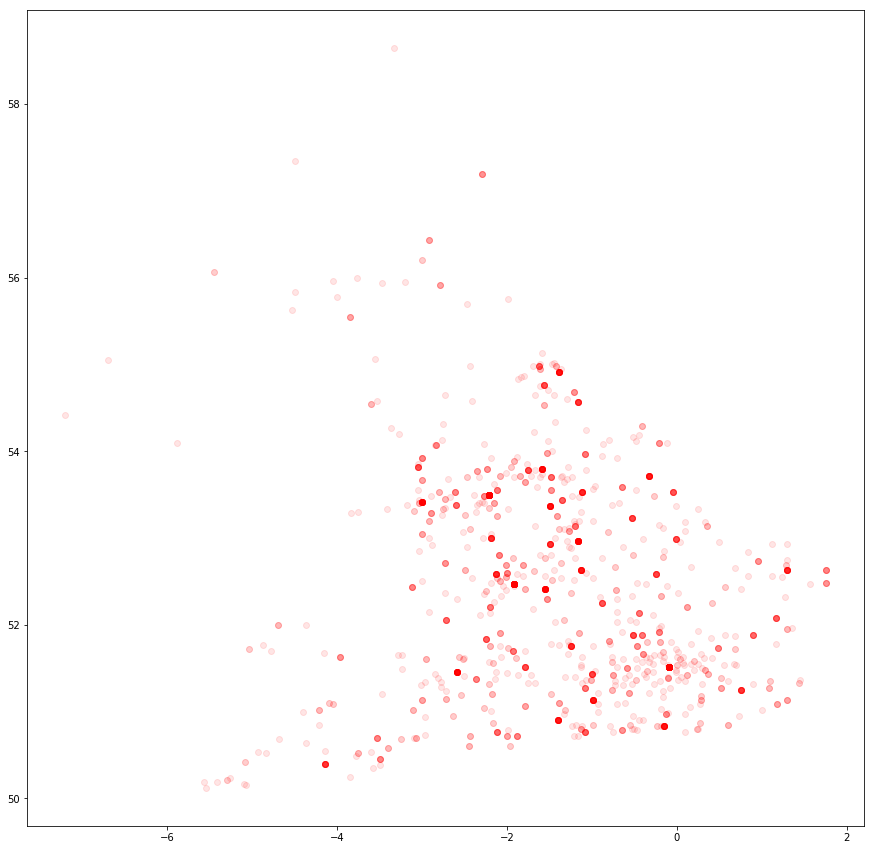

In [303]:
plt.figure(figsize=(15,15))
plt.scatter(ufos_uk['longitude'], ufos_uk['latitude'], c='red', alpha=0.1);



In [311]:
exoplanets['year'] = [d.split('-')[0] for d in exoplanets.rowupdate]
exoplanets.

,loc_rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,...,pl_bmassprov,pl_radj,pl_dens,st_teff,st_mass,st_rad,rowupdate,pl_facility,last_updated,year
0,1,11 Com,b,11 Com b,Radial Velocity,1,326.030000,1.290000,0.2310,NaN,...,Msini,NaN,NaN,4742.0,2.70,19.00,2014-05-14,Xinglong Station,2014-05-14,2014
1,2,11 UMi,b,11 UMi b,Radial Velocity,1,516.219970,1.530000,0.0800,NaN,...,Msini,NaN,NaN,4213.0,2.78,29.79,2018-09-06,Thueringer Landessternwarte Tautenburg,2018-09-06,2018
2,3,14 And,b,14 And b,Radial Velocity,1,185.840000,0.830000,0.0000,NaN,...,Msini,NaN,NaN,4813.0,2.20,11.00,2014-05-14,Okayama Astrophysical Observatory,2014-05-14,2014
3,4,14 Her,b,14 Her b,Radial Velocity,1,1773.400020,2.930000,0.3700,NaN,...,Msini,NaN,NaN,5338.0,0.90,0.93,2018-09-06,W. M. Keck Observatory,2018-09-06,2018
4,5,16 Cyg B,b,16 Cyg B b,Radial Velocity,1,798.500000,1.660000,0.6800,NaN,...,Msini,NaN,NaN,5750.0,1.08,1.13,2018-09-06,Multiple Observatories,2018-09-06,2018
5,6,18 Del,b,18 Del b,Radial Velocity,1,993.300000,2.600000,0.0800,NaN,...,Msini,NaN,NaN,4979.0,2.30,8.50,2014-05-14,Okayama Astrophysical Observatory,2014-05-14,2014
6,7,1RXS J160929.1-210524,b,1RXS J160929.1-210524 b,Imaging,1,NaN,330.000000,NaN,NaN,...,Mass,NaN,NaN,4060.0,0.85,NaN,2015-04-01,Gemini Observatory,2015-04-01,2015
7,8,24 Boo,b,24 Boo b,Radial Velocity,1,30.350600,0.190000,0.0420,NaN,...,Msini,NaN,NaN,4893.0,0.99,10.64,2018-04-26,Okayama Astrophysical Observatory,2018-04-26,2018
8,9,24 Sex,b,24 Sex b,Radial Velocity,2,452.800000,1.333000,0.0900,NaN,...,Msini,NaN,NaN,5098.0,1.54,4.90,2014-05-14,Lick Observatory,2014-05-14,2014
9,10,24 Sex,c,24 Sex c,Radial Velocity,2,883.000000,2.080000,0.2900,NaN,...,Msini,NaN,NaN,5098.0,1.54,4.90,2014-05-14,Lick Observatory,2014-05-14,2014


In [317]:
astronauts.Gender.value_counts()

Male      307
Female     50
Name: Gender, dtype: int64

In [318]:
astronauts.Status.value_counts()

Retired       220
Deceased       51
Active         50
Management     36
Name: Status, dtype: int64

In [319]:
astronauts[astronauts.Status == 'Active'].Gender.value_counts()

Male      37
Female    13
Name: Gender, dtype: int64

In [323]:
astronauts[astronauts.Status == 'Retired'].Gender.value_counts()

Male      196
Female     24
Name: Gender, dtype: int64

In [325]:
astronauts[astronauts.Status == 'Management'].Gender.value_counts()

Male      30
Female     6
Name: Gender, dtype: int64

In [332]:
astronauts['Military Branch'].value_counts()

US Air Force (Retired)             61
US Navy (Retired)                  59
US Navy                            21
US Air Force                       21
US Marine Corps (Retired)          17
US Army (Retired)                  13
US Army                             4
US Marine Corps                     3
US Air Force Reserves (Retired)     3
US Naval Reserves                   2
US Air Force Reserves               2
US Coast Guard (Retired)            2
US Marine Corps Reserves            2
US Naval Reserves (Retired)         1
Name: Military Branch, dtype: int64

In [334]:
astronauts['Military Rank'].unique()

array([nan, 'Colonel', 'Lieutenant Colonel', 'Captain', 'Major General',
       'Commander', 'Lieutenant Commander', 'Brigadier General', 'Major',
       'Lieutenant General', 'Chief Warrant Officer', 'Rear Admiral',
       'Vice Admiral'], dtype=object)

In [348]:
ufos[ufos['year_sighted'] <= 1878]

,day_sighted,time,Shape,duration (s),Location,country,description,latitude,longitude,State/Region,duration (hours),year_sighted
104422,1871-06-30,14:00:00,egg,NaN,"Yellowstone National Park, WY",United States,Old photos from 1871 show what appears to be o...,44.427963,-110.588455,Wyoming,NaN,1871
104423,1865-06-30,00:00:00,NaN,NaN,"Cadotte Pass, MT",United States,"1865 Cadotte Pass, Montana UFO crashHas nuforc...",NaN,NaN,Montana,NaN,1865
104424,1864-05-16,08:00:00,light,NaN,"Cave Spring, GA",United States,This is a UFO report by a respected Confederat...,34.107500,-85.336389,Georgia,NaN,1864
104425,1864-05-16,08:00:00,unknown,NaN,"Cave Springs, GA",United States,"In 1864, prior to airplanes, a white object wa...",NaN,NaN,Georgia,NaN,1864
104426,1861-03-29,00:00:00,cross,NaN,"New York City (Manhattan), NY",United States,1861 airborne cross over lower manhattanattn: ...,NaN,NaN,New York,NaN,1861
104427,1860-08-02,23:00:00,fireball,NaN,"Cherokee, NC",United States,"meteor or fireball passage (circa 1860)""I foun...",35.474167,-83.315000,North Carolina,NaN,1860
104428,1800-04-05,20:00:00,light,15.0,"Baton Rouge, LA",United States,UFO report communicated by Thomas JeffersonFro...,30.450556,-91.154444,Louisiana,0.004167,1800
104429,1790-06-30,21:00:00,fireball,60.0,"Carlisle, NY",United States,"Slow Moving Fireball, stench of burning sulphe...",NaN,NaN,New York,0.016667,1790
104430,1721-04-25,21:30:00,unknown,60.0,"Dallas, GA",United States,Two white dots at high altitude traveling very...,33.923611,-84.840833,Georgia,0.016667,1721
108308,1788-05-04,01:00:00,NaN,NaN,"Bounty (the ship),",NaN,National UFO Reporting Center FROM CAPT BLIGH...,NaN,NaN,NaN,NaN,1788
